# Muestreo

Crear las siguientes distribuciones
- Binomial (n=25, p=.70)
- Uniforme para un dado de 6 caras
- Exponencial(Teta=10)


In [67]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [65]:
p = 0.70
n = 23
binomial = stats.binom(n, p)
dado = stats.randint(low = 1, high = 7)
exponencial = stats.expon(10)

Para cada una de las distribuciones anteriores:
- Generar una muestra grande (200 o más)
- Tomar 100 muestras bootstrap de la muestra original
- Encontrar la media, la mediana y el percentil 23 de cada boostrap y guardarlo
- Graficar un histograma de las 100 medias, medianas y percentiles 23
- Mostrar los 3 estadísticos de la muestra junto con sus intervalos de confianza del 95%.


In [83]:
np.random.seed(100)
sample_binomial = binomial.rvs(200)
sample_dado = dado.rvs(400)
sample_exponencial = exponencial.rvs(600)

In [84]:
def bootstrap_sample_avg(data, n_bootstrap_samples=100):
    bootstrap_sample_avg = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_avg.append(np.mean(bootstrap_sample))
    return bootstrap_sample_avg

def bootstrap_sample_medians(data, n_bootstrap_samples=100):
    bootstrap_sample_medians = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_medians.append(np.median(bootstrap_sample))
    return bootstrap_sample_medians

def bootstrap_sample_percentile(data, q = 23, n_bootstrap_samples=100):
    bootstrap_sample_percentile = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_percentile.append(np.percentile(bootstrap_sample, q))
    return bootstrap_sample_percentile

In [85]:
avg_binomial = bootstrap_sample_avg(sample_binomial)
median_binomial = bootstrap_sample_medians(sample_binomial)
perc_binomial =bootstrap_sample_percentile(sample_binomial)

avg_dado = bootstrap_sample_avg(sample_dado)
median_dado = bootstrap_sample_medians(sample_dado)
perc_dado =bootstrap_sample_percentile(sample_dado)

avg_exponencial = bootstrap_sample_avg(sample_exponencial)
median_exponencial = bootstrap_sample_medians(sample_exponencial)
perc_exponencial =bootstrap_sample_percentile(sample_exponencial)

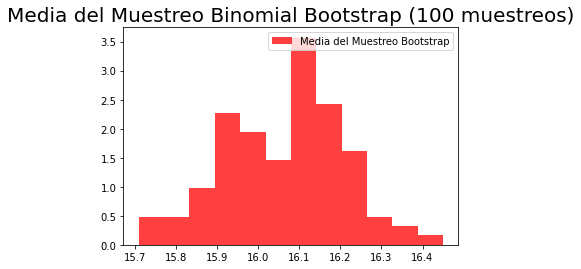

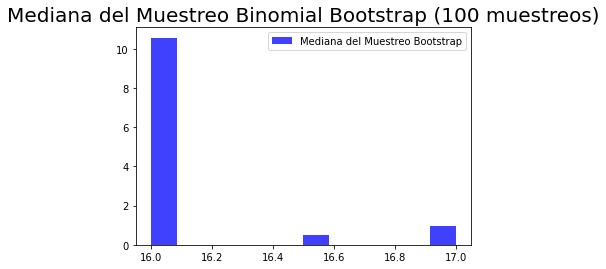

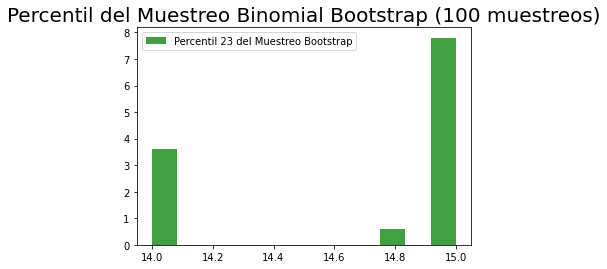

In [86]:
fig, ax = plt.subplots(1, figsize=(6, 4))
ax.hist(avg_binomial, bins=12, density=True, color="red", alpha=0.75,
        label="Media del Muestreo Bootstrap")
ax.legend()
# ax.tick_params(axis='both', which='major', labelsize=15)
_ = ax.set_title("Media del Muestreo Binomial Bootstrap (100 muestreos)", fontsize = 20)

fig, ax = plt.subplots(1, figsize=(6, 4))
ax.hist(median_binomial, bins=12, density=True, color="blue", alpha=0.75,
        label="Mediana del Muestreo Bootstrap")
ax.legend()
# ax.tick_params(axis='both', which='major', labelsize=15)
_ = ax.set_title("Mediana del Muestreo Binomial Bootstrap (100 muestreos)", fontsize = 20)

fig, ax = plt.subplots(1, figsize=(6, 4))
ax.hist(perc_binomial, bins=12, density=True, color="green", alpha=0.75,
        label="Percentil 23 del Muestreo Bootstrap")
ax.legend()
# ax.tick_params(axis='both', which='major', labelsize=15)
_ = ax.set_title("Percentil del Muestreo Binomial Bootstrap (100 muestreos)", fontsize = 20)

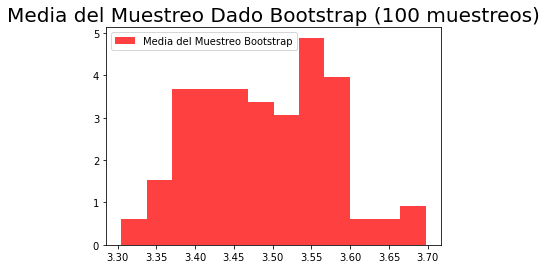

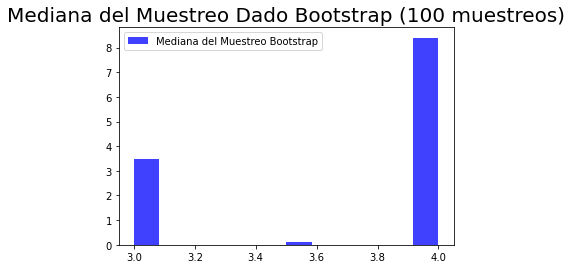

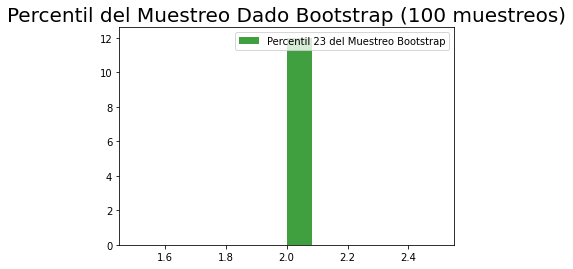

In [87]:
fig, ax = plt.subplots(1, figsize=(6, 4))
ax.hist(avg_dado, bins=12, density=True, color="red", alpha=0.75,
        label="Media del Muestreo Bootstrap")
ax.legend()
# ax.tick_params(axis='both', which='major', labelsize=15)
_ = ax.set_title("Media del Muestreo Dado Bootstrap (100 muestreos)", fontsize = 20)

fig, ax = plt.subplots(1, figsize=(6, 4))
ax.hist(median_dado, bins=12, density=True, color="blue", alpha=0.75,
        label="Mediana del Muestreo Bootstrap")
ax.legend()
# ax.tick_params(axis='both', which='major', labelsize=15)
_ = ax.set_title("Mediana del Muestreo Dado Bootstrap (100 muestreos)", fontsize = 20)

fig, ax = plt.subplots(1, figsize=(6, 4))
ax.hist(perc_dado, bins=12, density=True, color="green", alpha=0.75,
        label="Percentil 23 del Muestreo Bootstrap")
ax.legend()
# ax.tick_params(axis='both', which='major', labelsize=15)
_ = ax.set_title("Percentil del Muestreo Dado Bootstrap (100 muestreos)", fontsize = 20)

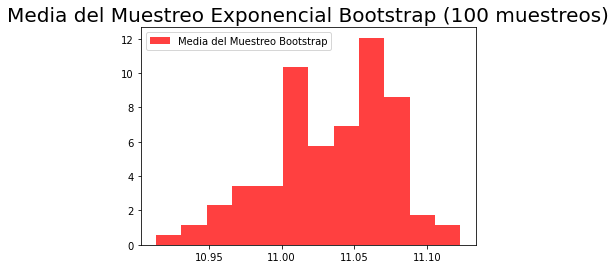

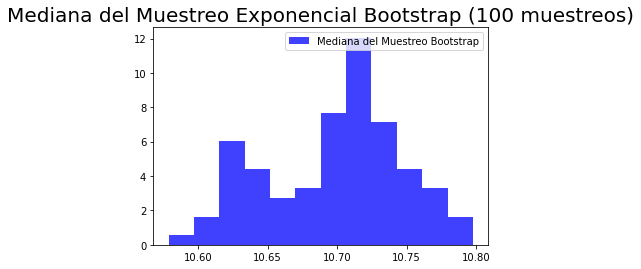

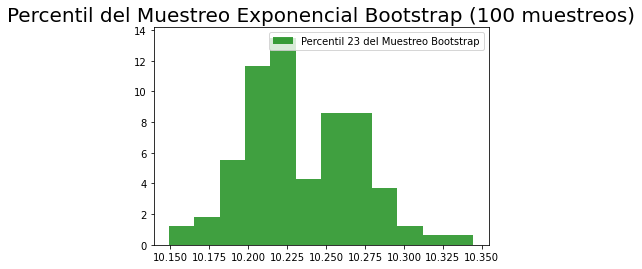

In [88]:
fig, ax = plt.subplots(1, figsize=(6, 4))
ax.hist(avg_exponencial, bins=12, density=True, color="red", alpha=0.75,
        label="Media del Muestreo Bootstrap")
ax.legend()
# ax.tick_params(axis='both', which='major', labelsize=15)
_ = ax.set_title("Media del Muestreo Exponencial Bootstrap (100 muestreos)", fontsize = 20)

fig, ax = plt.subplots(1, figsize=(6, 4))
ax.hist(median_exponencial, bins=12, density=True, color="blue", alpha=0.75,
        label="Mediana del Muestreo Bootstrap")
ax.legend()
# ax.tick_params(axis='both', which='major', labelsize=15)
_ = ax.set_title("Mediana del Muestreo Exponencial Bootstrap (100 muestreos)", fontsize = 20)

fig, ax = plt.subplots(1, figsize=(6, 4))
ax.hist(perc_exponencial, bins=12, density=True, color="green", alpha=0.75,
        label="Percentil 23 del Muestreo Bootstrap")
ax.legend()
# ax.tick_params(axis='both', which='major', labelsize=15)
_ = ax.set_title("Percentil del Muestreo Exponencial Bootstrap (100 muestreos)", fontsize = 20)

In [89]:
print('Para la muestra binomial:')
a = np.percentile(avg_binomial, 2.5)
b = np.percentile(avg_binomial, 97.5)
print("Media: {:2.2f}".format(np.average(sample_binomial)))
print("Intervalo de Confianza de la media (Bootstrap): [{:2.2f}, {:2.2f}]".format(
    a,b))

a = np.percentile(median_binomial, 2.5)
b = np.percentile(median_binomial, 97.5)
print("Mediana: {:2.2f}".format(np.median(sample_binomial)))
print("8Intervalo de Confianza de la mediana (Bootstrap): [{:2.2f}, {:2.2f}]".format(
    a,b))
    
a = np.percentile(perc_binomial, 2.5)
b = np.percentile(perc_binomial, 97.5)
print("Percentil 23: {:2.2f}".format(np.percentile(sample_binomial, 23)))
print("Intervalo de Confianza del percentil 23 (Bootstrap): [{:2.2f}, {:2.2f}]".format(
    a,b))

Para la muestra binomial:
Media: 16.05
Intervalo de Confianza de la media (Bootstrap): [15.78, 16.32]
Mediana: 16.00
8Intervalo de Confianza de la mediana (Bootstrap): [16.00, 17.00]
Percentil 23: 15.00
Intervalo de Confianza del percentil 23 (Bootstrap): [14.00, 15.00]


In [90]:
print('Para la muestra del dado:')
a = np.percentile(avg_dado, 2.5)
b = np.percentile(avg_dado, 97.5)
print("Media: {:2.2f}".format(np.average(sample_dado)))
print("Intervalo de Confianza de la media (Bootstrap): [{:2.2f}, {:2.2f}]".format(
    a,b))

a = np.percentile(median_dado, 2.5)
b = np.percentile(median_dado, 97.5)
print("Mediana: {:2.2f}".format(np.median(sample_dado)))
print("Intervalo de Confianza de la mediana (Bootstrap): [{:2.2f}, {:2.2f}]".format(
    a,b))

a = np.percentile(perc_dado, 2.5)
b = np.percentile(perc_dado, 97.5)
print("Percentil 23: {:2.2f}".format(np.percentile(sample_dado, 23)))
print("Intervalo de Confianza del percentil 23 (Bootstrap): [{:2.2f}, {:2.2f}]".format(
    a,b))

Para la muestra del dado:
Media: 3.50
Intervalo de Confianza de la media (Bootstrap): [3.34, 3.66]
Mediana: 4.00
Intervalo de Confianza de la mediana (Bootstrap): [3.00, 4.00]
Percentil 23: 2.00
Intervalo de Confianza del percentil 23 (Bootstrap): [2.00, 2.00]


In [92]:
print('Para la muestra exponencial:')
a = np.percentile(avg_exponencial, 2.5)
b = np.percentile(avg_exponencial, 97.5)
print("Media: {:2.2f}".format(np.average(sample_exponencial)))
print("Intervalo de Confianza de la media (Bootstrap): [{:2.2f}, {:2.2f}]".format(
    a,b))

a = np.percentile(median_exponencial, 2.5)
b = np.percentile(median_exponencial, 97.5)
print("Mediana: {:2.2f}".format(np.median(sample_exponencial)))
print("Intervalo de Confianza de la mediana (Bootstrap): [{:2.2f}, {:2.2f}]".format(
    a,b))

a = np.percentile(perc_exponencial, 2.5)
b = np.percentile(perc_exponencial, 97.5)
print("Percentil 23: {:2.2f}".format(np.percentile(sample_exponencial, 23)))
print("Intervalo de Confianza del percentil 23 (Bootstrap): [{:2.2f}, {:2.2f}]".format(
    a,b))

Para la muestra exponencial:
Media: 11.03
Intervalo de Confianza de la media (Bootstrap): [10.95, 11.10]
Mediana: 10.70
Intervalo de Confianza de la mediana (Bootstrap): [10.61, 10.78]
Percentil 23: 10.22
Intervalo de Confianza del percentil 23 (Bootstrap): [10.18, 10.30]


La empresa X quiere averiguar si el cambio a monitores Apple aumenta la productividad de sus programadores. Se elige una muestra aleatoria de 25 personas y se les cambia el monitor. La diferencia entre su productividad antes y después del cambio de monitor se encuentra en el documento “productivity.txt”
- Cargar los datos
- Crear una función bootstrap_ci para calcular el intervalo de confianza de cualquier estadística muestral (en este caso la media). 
- La función debe tomar una muestra, una función que calcule el estadístico muestral, el número de remuestreos (por defecto: 10000) y el nivel de confianza (por defecto: 0,95). 
- La función deberá devolver los límites inferior y superior del intervalo de confianza y la distribución bootstrap de la estadística muestral.

Ej. bootstrap_ci(muestra, función_estatal=np.media, remuestreos=1000, ci=95)
Representar la distribución bootstrap de las medias en un histograma.


In [100]:
productivity = open('Files actividades/productivity.txt', 'r')

In [101]:
productivity = productivity.readlines()
productivity

['-1.910000000000000142e+01\n',
 '-1.519999999999999929e+01\n',
 '-1.240000000000000036e+01\n',
 '-1.539999999999999858e+01\n',
 '-8.699999999999999289e+00\n',
 '-6.699999999999999289e+00\n',
 '-5.899999999999999467e+00\n',
 '-3.500000000000000000e+00\n',
 '-3.099999999999999645e+00\n',
 '-2.099999999999999645e+00\n',
 '4.200000000000001066e+00\n',
 '6.099999999999999645e+00\n',
 '7.000000000000001776e+00\n',
 '9.099999999999999645e+00\n',
 '1.000000000000000178e+01\n',
 '1.029999999999999893e+01\n',
 '1.320000000000000107e+01\n',
 '1.009999999999999964e+01\n',
 '1.409999999999999964e+01\n',
 '1.440000000000000036e+01\n',
 '2.010000000000000142e+01\n',
 '2.629999999999999716e+01\n',
 '2.769999999999999574e+01\n',
 '2.219999999999999574e+01\n',
 '2.339999999999999858e+01\n']

In [102]:
values = np.array(productivity).astype(np.float)

C:\Users\ncordova\AppData\Local\Temp\ipykernel_7248\2497140166.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  values = np.array(productivity).astype(np.float)


In [110]:
def bootstrap_ci(sample_values, stat_function = np.mean, resamples = 10000, ci = 95):
    statistics = np.zeros(resamples)
    for i in range(resamples):
        bootstrap = np.random.choice(sample_values, len(sample_values), replace = True)
        statistic = stat_function(bootstrap)
        statistics[i] = statistic
    lower = (100-ci)/2
    return np.percentile(statistics, lower), stat_function(sample_values), np.percentile(statistics, 100-lower), statistics

In [113]:
lower_bound, estimate, upper_bound, bootstraps =  bootstrap_ci(values)

In [114]:
lower_bound, estimate, upper_bound

(-0.21210000000000015, 5.044, 10.264)

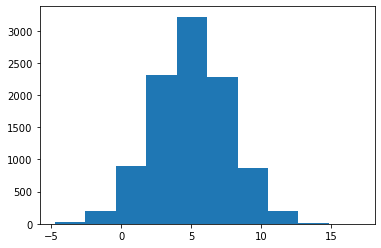

In [115]:
plt.hist(bootstraps);